<a href="https://colab.research.google.com/github/YogeshPandey29/Projects/blob/master/Predicting_whether_a_person_is_diabetic_under_Binary_Classification_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this mini-project, we have tried to implement a binary classification model using a datset. This dataset consists of the physical records of several number of patients; using which we are required to predict whether these would be suffering from diabetes.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
diabetes_data = pd.read_csv("DiabetesDatasetForLogisticRegression.csv")
diabetes_data.head(10)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos
5,5,166,72,19,175,25.8,0.587,51,pos
6,0,118,84,47,230,45.8,0.551,31,pos
7,1,103,30,38,83,43.3,0.183,33,neg
8,1,115,70,30,96,34.6,0.529,32,pos
9,3,126,88,41,235,39.3,0.704,27,neg


In [23]:
diabetes_data['diabetes'] = diabetes_data['diabetes'].map({"neg":0, "pos":1})
diabetes_data.head(10)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
5,5,166,72,19,175,25.8,0.587,51,1
6,0,118,84,47,230,45.8,0.551,31,1
7,1,103,30,38,83,43.3,0.183,33,0
8,1,115,70,30,96,34.6,0.529,32,1
9,3,126,88,41,235,39.3,0.704,27,0


In [24]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


In [25]:
diabetes_data.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
X = diabetes_data.iloc[:, 0:8]
X

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26
388,1,128,88,39,110,36.5,1.057,37
389,2,88,58,26,16,28.4,0.766,22
390,10,101,76,48,180,32.9,0.171,63


In [27]:
y = diabetes_data.iloc[:, -1]
y

0      0
1      1
2      1
3      1
4      1
      ..
387    1
388    1
389    0
390    0
391    0
Name: diabetes, Length: 392, dtype: int64

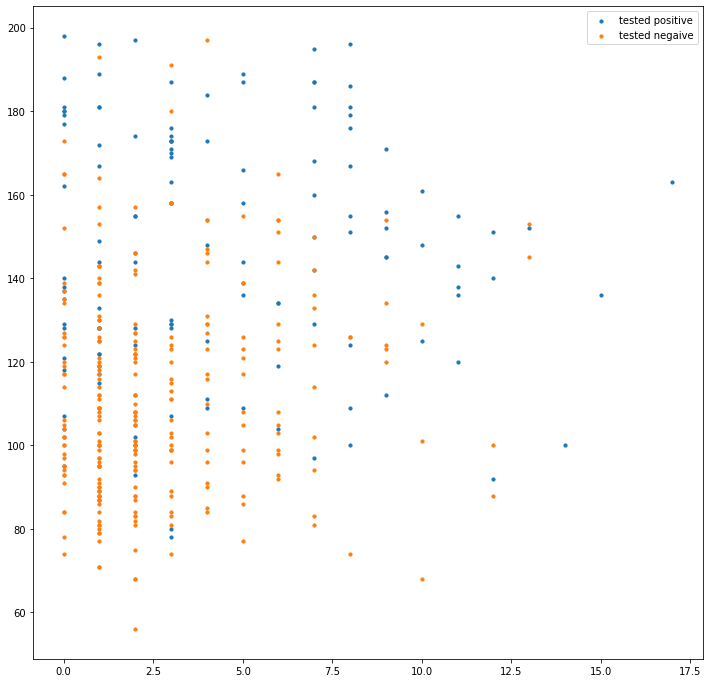

In [28]:
tested_pos = diabetes_data.loc[y == 1]
tested_neg = diabetes_data.loc[y == 0]
plt.figure(figsize=(12, 12))
plt.scatter(tested_pos.iloc[:,0], tested_pos.iloc[:,1], s = 10, label = "tested positive")
plt.scatter(tested_neg.iloc[:,0], tested_neg.iloc[:,1], s = 10, label = "tested negaive")
plt.legend()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train, y_train)
print(X_test, y_test)

     pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age
187         2      122        52       43      158  36.2     0.816   28
163         1      122        64       32      156  35.1     0.692   30
391         5      121        72       23      112  26.2     0.245   30
47          4      144        58       28      140  29.5     0.287   37
154         0      106        70       37      148  39.4     0.605   22
..        ...      ...       ...      ...      ...   ...       ...  ...
378         2       99        60       17      160  36.6     0.453   21
16          4      103        60       33      192  24.0     0.966   33
135         5      155        84       44      545  38.7     0.619   34
58          3      120        70       30      135  42.9     0.452   30
13         13      145        82       19      110  22.2     0.245   57

[313 rows x 8 columns] 187    0
163    1
391    0
47     0
154    0
      ..
378    0
16     0
135    0
58     0
13     0
Name: diabete

In [30]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression(max_iter = 200)    #I have increased the number of iterations to 200 (i.e. max_iter = 200). The default value of which is set to 100.
logisticModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
print(logisticModel.coef_)

[[ 6.92153744e-02  3.62308709e-02 -1.25084164e-02  3.27273000e-02
  -2.25885080e-04  5.59812591e-02  1.37387118e+00  4.76129799e-02]]


In [32]:
print(logisticModel.intercept_)

[-9.74453752]


In [33]:
predictions = logisticModel.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Now, to measure the accuracy of the predictions made by our model, we use confusion matrix to get an overview of how much correct predictions our model made as compared to incorrect ones. Here, we have obtained a 2*2 order matrix as we are implementing a binary classification problem.
The elements present in the priciple diagonal of this matrix represent the correct predictions made by our model whereas the off-diagonal elements denote the incorrect ones.

In [34]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, predictions)
print(confusionMatrix)

[[47  8]
 [10 14]]


From the results obtained above, we can see that the number of correct predictions made are (47 + 14), and those of the incorrect predictions are (10 + 8).